<a href="https://colab.research.google.com/github/ywan1416/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Error and Instability

Numerical error only approximate solutions to equations( computers can't represent real numbers exactly).

1) Truncation error
2) Round-off error

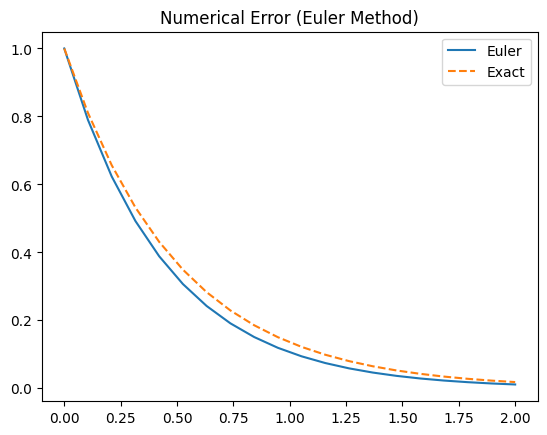

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# dy/dt = -2y, y(0) = 1 — exact solution: y(t) = exp(-2t)
f = lambda t, y: -2*y
y_exact = lambda t: np.exp(-2*t)

def euler(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + (t[i] - t[i-1]) * f(t[i-1], y[i-1])
    return y

t = np.linspace(0, 2, 20)  # fewer points = larger step
y_euler = euler(f, 1, t)

plt.plot(t, y_euler, label="Euler")
plt.plot(t, y_exact(t), label="Exact", linestyle='--')
plt.legend(); plt.title("Numerical Error (Euler Method)")
plt.show()

# Predictor-Corrector Methods

like Euler

Predictor: Guess the next value

Corrector: Refine the guess using the slope at the midpoint

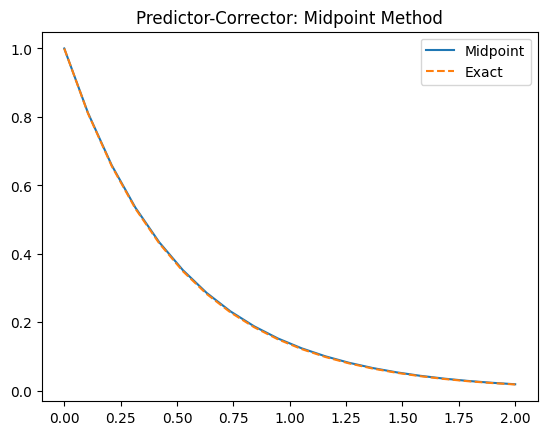

In [2]:
def midpoint_method(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        h = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h/2, y[i-1] + h/2 * k1)
        y[i] = y[i-1] + h * k2
    return y

t = np.linspace(0, 2, 20)
y_midpoint = midpoint_method(f, 1, t)

plt.plot(t, y_midpoint, label="Midpoint")
plt.plot(t, y_exact(t), label="Exact", linestyle='--')
plt.legend(); plt.title("Predictor-Corrector: Midpoint Method")
plt.show()